In [137]:
# Todos:
# Redo gender variable cleaning
# Add survey questions to graphs
# Is there any exploration to be done with the timestamp and comments variable?

# Mental Health in Tech Survey
Dataset obtained from [Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey), which was originally sourced from [OSMI](https://osmihelp.org/research/).

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = 100

In [71]:
# Load the dataset
mh_survey = pd.read_csv("survey.csv")
mh_survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [72]:
mh_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

## Exploratory Analysis and Data Cleaning

In [73]:
# Age
mh_survey["Age"].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [74]:
print("Max age: {}".format(np.max(mh_survey["Age"])))
print("Min age: {}".format(np.min(mh_survey["Age"])))

Max age: 99999999999
Min age: -1726


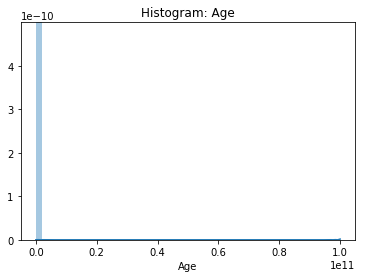

In [75]:
sns.distplot(mh_survey["Age"])
plt.title("Histogram: Age")
plt.show()

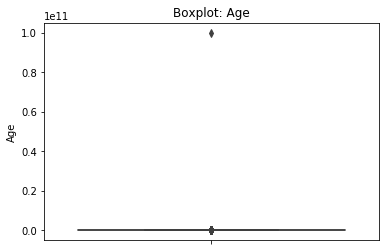

In [76]:
sns.boxplot(y="Age", data=mh_survey)
plt.title("Boxplot: Age")
plt.show()

In [77]:
# Quick check on values for age to see how many values fall outside the normal working ages (18-67)
for age in mh_survey["Age"]:
    if (age > 67) | (age < 18):
        print(age)

-29
329
99999999999
-1726
5
8
11
-1
72


In [78]:
# The reported age of 72 falls outside the intial range but is plausable
# We replace the remaining values with None and impute with the mean
def age_cleaner(age):
    if (age > 72) | (age < 18):
        return None
    else:
        return age

mh_survey["Age"] = mh_survey["Age"].apply(lambda x: age_cleaner(x))
mh_survey["Age"].fillna(mh_survey["Age"].mean(), inplace=True)
mh_survey["Age"].describe()

count    1259.000000
mean       32.076739
std         7.265061
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

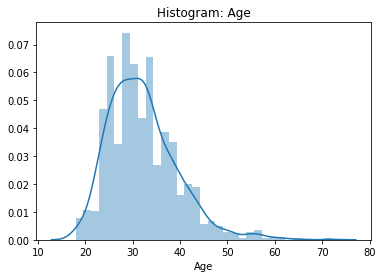

In [79]:
sns.distplot(mh_survey["Age"])
plt.title("Histogram: Age")
plt.show()

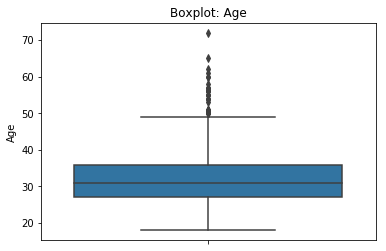

In [80]:
sns.boxplot(y="Age", data=mh_survey)
plt.title("Boxplot: Age")
plt.show()

In [81]:
# Gender
mh_survey["Gender"].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Female (trans)                                      2
Cis Male                                            2
Man                                                 2
femail                                              1
woman                                               1
Mail                                                1
A little about you          

In [82]:
def gender_sieve(gender):
    if (gender == "male") | (gender == "female"):
        return gender
    elif (gender == "m") | (gender == "man"):
        return "male"
    elif (gender == "f") | (gender == "woman"):
        return"female"
    else:
        return "other"


mh_survey["Gender"] = mh_survey["Gender"].apply(lambda x: x.strip().lower())
mh_survey["Gender"] = mh_survey["Gender"].apply(lambda x: gender_sieve(x))

mh_survey["Gender"].value_counts()

male      976
female    242
other      41
Name: Gender, dtype: int64

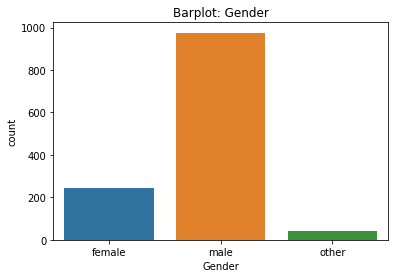

In [83]:
sns.countplot(mh_survey["Gender"])
plt.title("Barplot: Gender")
plt.show()

In [84]:
# Country
mh_survey["Country"].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Switzerland                 7
Sweden                      7
Poland                      7
Italy                       7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Singapore                   4
Bulgaria                    4
Finland                     3
Russia                      3
Mexico                      3
Austria                     3
Croatia                     2
Greece                      2
Denmark                     2
Colombia                    2
Portugal                    2
Moldova                     1
Norway                      1
Bahamas, The                1
Georgia                     1
Uruguay   

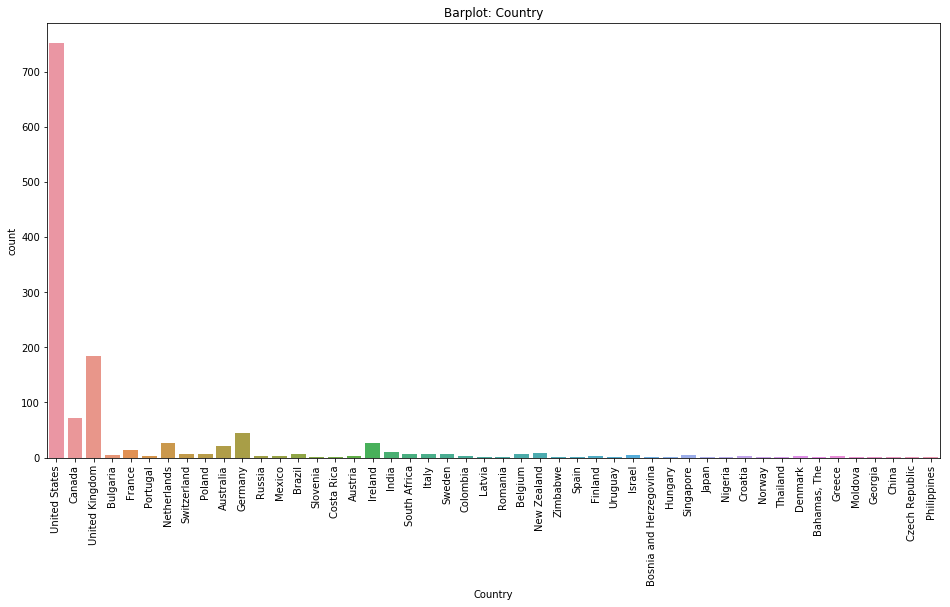

In [85]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(mh_survey["Country"])
plt.title("Barplot: Country")
plt.xticks(rotation=90)
plt.show()

In [86]:
# State
mh_survey["state"].value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
OR     29
PA     29
IL     29
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
GA     12
MO     12
WI     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
SC      5
KY      5
DC      4
IA      4
CT      4
SD      3
KS      3
VT      3
NV      3
NH      3
NM      2
NE      2
WY      2
MS      1
ME      1
ID      1
WV      1
RI      1
LA      1
Name: state, dtype: int64

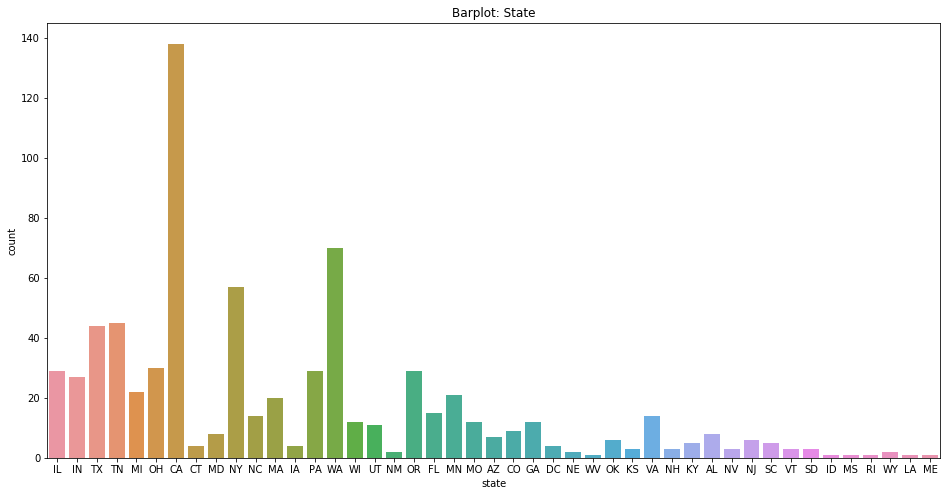

In [87]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(mh_survey["state"])
plt.title("Barplot: State")
plt.show()

In [88]:
# Self employed
mh_survey["self_employed"].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

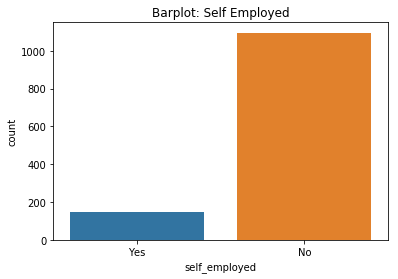

In [89]:
sns.countplot(mh_survey["self_employed"])
plt.title("Barplot: Self Employed")
plt.show()

In [90]:
# Family history
mh_survey["family_history"].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

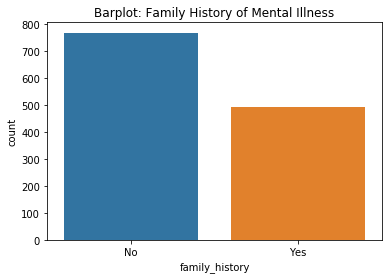

In [91]:
sns.countplot(mh_survey["family_history"])
plt.title("Barplot: Family History of Mental Illness")
plt.show()

In [92]:
# Treatment
mh_survey["treatment"].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

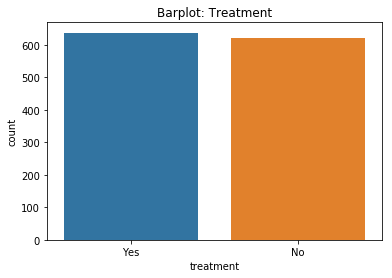

In [93]:
sns.countplot(mh_survey["treatment"])
plt.title("Barplot: Treatment")
plt.show()

In [94]:
# Work interfere
mh_survey["work_interfere"].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

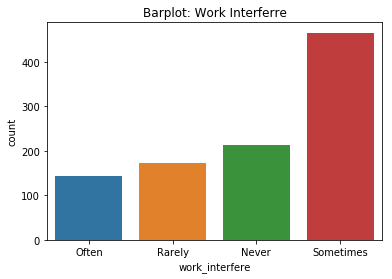

In [95]:
sns.countplot(mh_survey["work_interfere"])
plt.title("Barplot: Work Interferre")
plt.show()

In [96]:
# Number of employees
mh_survey["no_employees"].value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

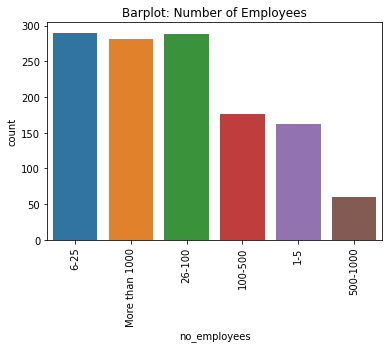

In [97]:
sns.countplot(mh_survey["no_employees"])
plt.title("Barplot: Number of Employees")
plt.xticks(rotation=90)
plt.show()

In [98]:
# Remote work
mh_survey["remote_work"].value_counts()

No     883
Yes    376
Name: remote_work, dtype: int64

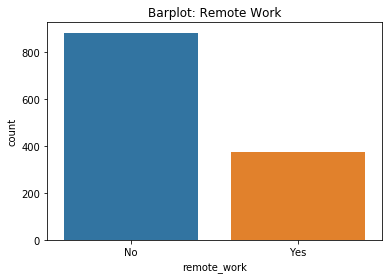

In [99]:
sns.countplot(mh_survey["remote_work"])
plt.title("Barplot: Remote Work")
plt.show()

In [100]:
# Tech company
mh_survey["tech_company"].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

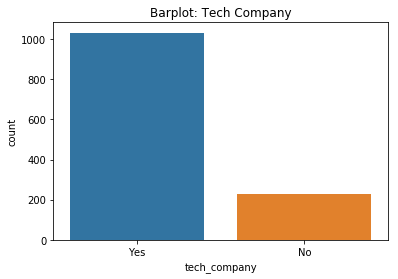

In [101]:
sns.countplot(mh_survey["tech_company"])
plt.title("Barplot: Tech Company")
plt.show()

In [102]:
# Mental health benefits
mh_survey["benefits"].value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

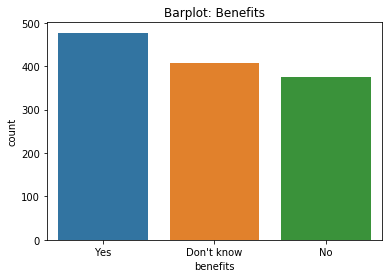

In [103]:
sns.countplot(mh_survey["benefits"])
plt.title("Barplot: Benefits")
plt.show()

In [104]:
# Care options
mh_survey["care_options"].value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

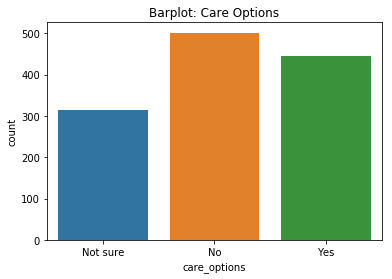

In [105]:
sns.countplot(mh_survey["care_options"])
plt.title("Barplot: Care Options")
plt.show()

In [106]:
# Wellness program
mh_survey["wellness_program"].value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

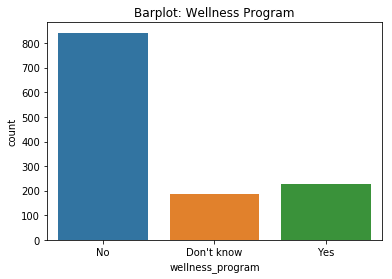

In [107]:
sns.countplot(mh_survey["wellness_program"])
plt.title("Barplot: Wellness Program")
plt.show()

In [108]:
# Seek help
mh_survey["seek_help"].value_counts()

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

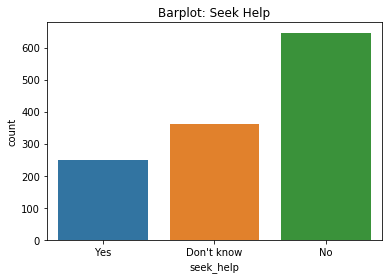

In [109]:
sns.countplot(mh_survey["seek_help"])
plt.title("Barplot: Seek Help")
plt.show()

In [110]:
# Anonymity
mh_survey["anonymity"].value_counts()

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

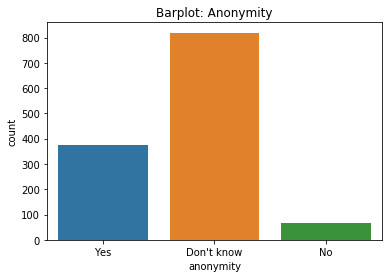

In [111]:
sns.countplot(mh_survey["anonymity"])
plt.title("Barplot: Anonymity")
plt.show()

In [112]:
# Leave
mh_survey["leave"].value_counts()

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

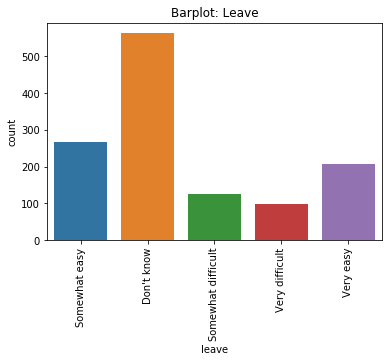

In [113]:
sns.countplot(mh_survey["leave"])
plt.title("Barplot: Leave")
plt.xticks(rotation=90)
plt.show()

In [114]:
# Mental health consequence
mh_survey["mental_health_consequence"].value_counts()

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

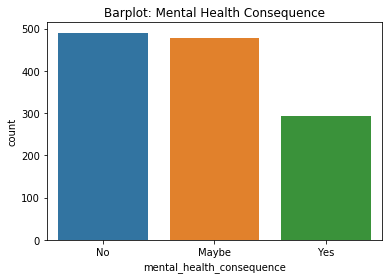

In [115]:
sns.countplot(mh_survey["mental_health_consequence"])
plt.title("Barplot: Mental Health Consequence")
plt.show()

In [116]:
# Physical health consquences
mh_survey["phys_health_consequence"].value_counts()

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

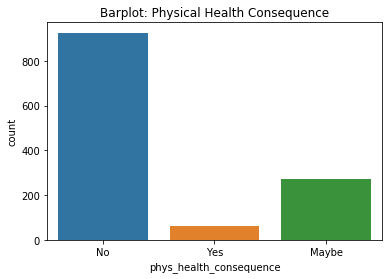

In [117]:
sns.countplot(mh_survey["phys_health_consequence"])
plt.title("Barplot: Physical Health Consequence")
plt.show()

In [118]:
# Coworkser
mh_survey["coworkers"].value_counts()

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

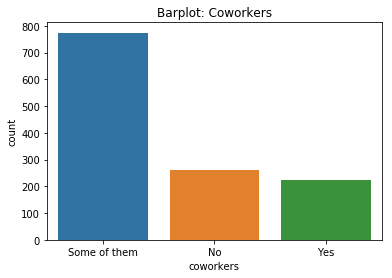

In [119]:
sns.countplot(mh_survey["coworkers"])
plt.title("Barplot: Coworkers")
plt.show()

In [120]:
# Supervisor
mh_survey["supervisor"].value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

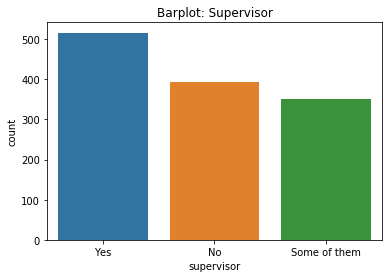

In [121]:
sns.countplot(mh_survey["supervisor"])
plt.title("Barplot: Supervisor")
plt.show()

In [122]:
# Mental health interview
mh_survey["mental_health_interview"].value_counts()

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

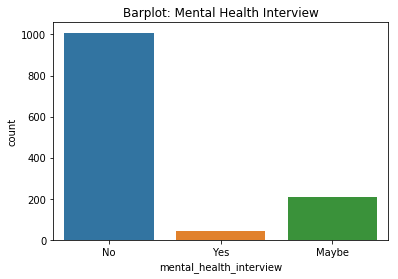

In [123]:
sns.countplot(mh_survey["mental_health_interview"])
plt.title("Barplot: Mental Health Interview")
plt.show()

In [124]:
# Physical health interview
mh_survey["phys_health_interview"].value_counts()

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

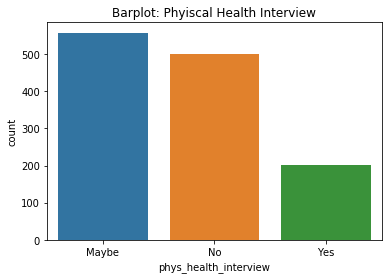

In [125]:
sns.countplot(mh_survey["phys_health_interview"])
plt.title("Barplot: Phyiscal Health Interview")
plt.show()

In [126]:
# Mental vs. Physical
mh_survey["mental_vs_physical"].value_counts()

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

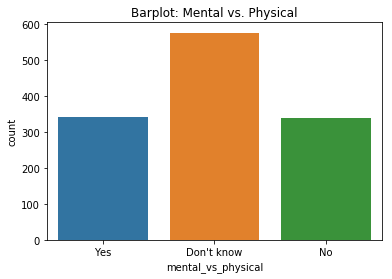

In [127]:
sns.countplot(mh_survey["mental_vs_physical"])
plt.title("Barplot: Mental vs. Physical")
plt.show()

In [128]:
# Observed consequences 
mh_survey["obs_consequence"].value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

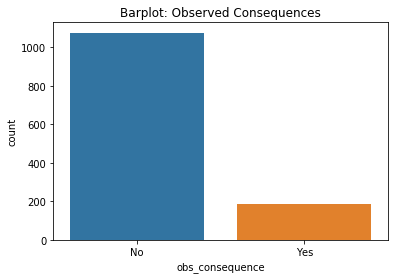

In [129]:
sns.countplot(mh_survey["obs_consequence"])
plt.title("Barplot: Observed Consequences")
plt.show()

In [130]:
#for comment in mh_survey["comments"].dropna():
    #print(comment)
    #print()

## Research proposal
### Problem
The data would suggest that there is a preceived stigma attached to mental health problems. This most shows up in the answers to two of the survey questions:

In [131]:
def yes_maybe_combine(response):
    if (response == "Yes") | (response == "Maybe"):
        return "Yes/Maybe"
    else:
        return response
mh_survey["mental_health_consequence2"] = mh_survey["mental_health_consequence"].apply(lambda x: yes_maybe_combine(x))
mh_survey["phys_health_consequence2"] = mh_survey["phys_health_consequence"].apply(lambda x: yes_maybe_combine(x))

mental_cons_table = mh_survey["mental_health_consequence2"].value_counts(normalize=True)
physical_cons_table = mh_survey["phys_health_consequence2"].value_counts(normalize=True)
print("Do you think that discussing a mental health issue with your employer would have negative consequences?")
print(mental_cons_table)

print("\nDo you think that discussing a physical health issue with your employer would have negative consequences?")
print(physical_cons_table)

Do you think that discussing a mental health issue with your employer would have negative consequences?
Yes/Maybe    0.610802
No           0.389198
Name: mental_health_consequence2, dtype: float64

Do you think that discussing a physical health issue with your employer would have negative consequences?
No           0.73471
Yes/Maybe    0.26529
Name: phys_health_consequence2, dtype: float64


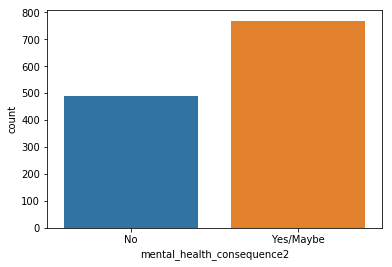

In [132]:
sns.countplot(x=mh_survey["mental_health_consequence2"])
plt.show()

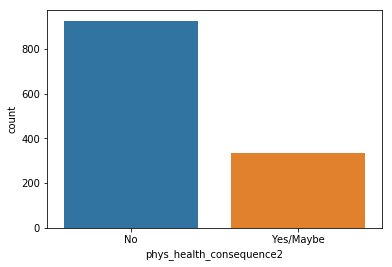

In [133]:
sns.countplot(x=mh_survey["phys_health_consequence2"])
plt.show()

When asked, “do you think that discussing a __mental health__ issue with your employer would have negative consequences?” 61% of respondents answered “yes” or “maybe”, while only 39% answered “no”. However, when asked the same question with __physical health__ replacing mental health, only 27% of respondents answered “yes” or “maybe”, while 73% answered no.

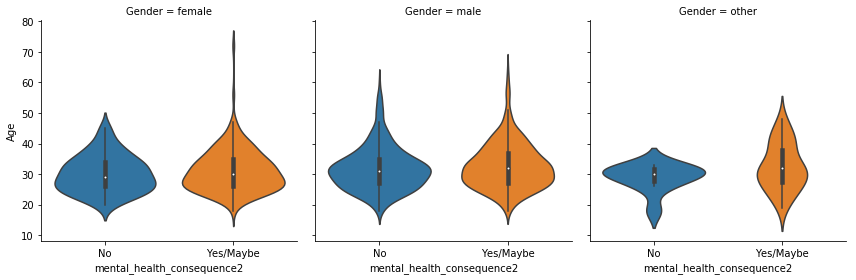

In [134]:
g = sns.factorplot(x="mental_health_consequence2", y="Age", data=mh_survey, kind="violin", col="Gender")

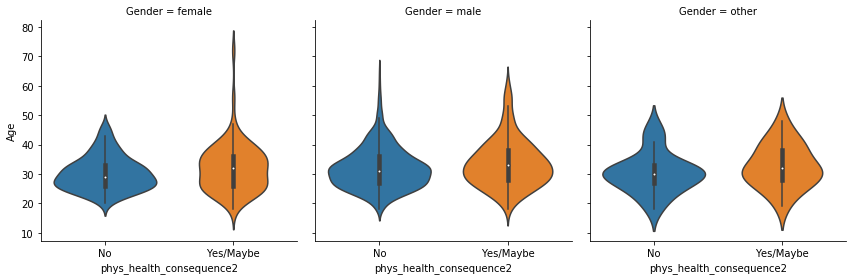

In [135]:
g = sns.factorplot(x="phys_health_consequence2", y="Age", data=mh_survey, kind="violin", col="Gender")

The results are consistent across gender and age. This would indicate a widely perceived stigma attached to mental health issues. This is a problem since this perceived stigma could reduce employee willingness to seek treatment for mental health issues and like physical health issues, if left untreated, mental health issues can reduce an employee’s quality of life and make them less productive.

### Potential solution 

A well designed and executed company based mental health awareness program may reduce the stigma attached to mental health issues. To test this we can take a sample of tech firms, and split them into two groups: Group 1 is the treatment group which implements a mental health awareness program. Group 2 is the control group, which does not implement a mental health awareness program. At the end of the program’s implementation, the employees will be given a survey that asks the same questions regarding mental and physical health consquences.

### Outcome (key metric)

To evaluate success we will calculate a metric I will call mental health perception gap. I define this as as the frequency answered “no” to mental health consequences less the frequency answered “no” to physical health consequences. For example, the current gap we observe in the survey is calculated as follows:

In [136]:
mental_no = mental_cons_table[1]
phyiscal_no = physical_cons_table[0]

mental_gap = mental_no - phyiscal_no
print(mental_gap)

-0.34551231135822086


For this metric, a score of 0.0 would indicate parity between attitudes towards mental and physical health. 

### Hypothesis
The hypothesis is that firms implementing the mental health awareness program will see a reduction in the gap metric. The null hypothesis is that no difference exists between the treatment and control groups. More formally, the null hypothesis is that there is no significant difference between the means of the treatment and control group. We will use the t-distribution to test the difference and consider it significant at the 0.05 level.

### Secondary metrics
We will track data on gender, age, location, and firm size (by the number of employees) to examine bias and look for trends among these groups.

### Rollout plan ????
Given that programs of like the one being tested here can be expensive, I suspect a gradual rollout would be prudent. Monitoring a 10% rollout would allow time to correct for any unanticipated problems before ramping up to 50%. I don’t know how to speak to either the size of the treatment/control groups or the duration of the experiment.